In [1]:
# This program uses an artificial neural network called Long term short memory (LSTM)
# to predict the closing stock proce of a corporation (Apple Inc.) using the past 60 days stock price

In [2]:
#Import libraries
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-8-3')
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,309.786346
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,317.722321
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,313.995514
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,306.695282
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,314.609314
...,...,...,...,...,...,...
2020-07-28,2194.000000,2150.649902,2156.199951,2177.699951,25435297.0,2177.699951
2020-07-29,2182.800049,2070.449951,2177.899902,2096.649902,33534147.0,2096.649902
2020-07-30,2139.699951,2072.000000,2099.000000,2108.850098,33623699.0,2108.850098


In [4]:
#Get the number of rows and columns
df.shape

(2111, 6)

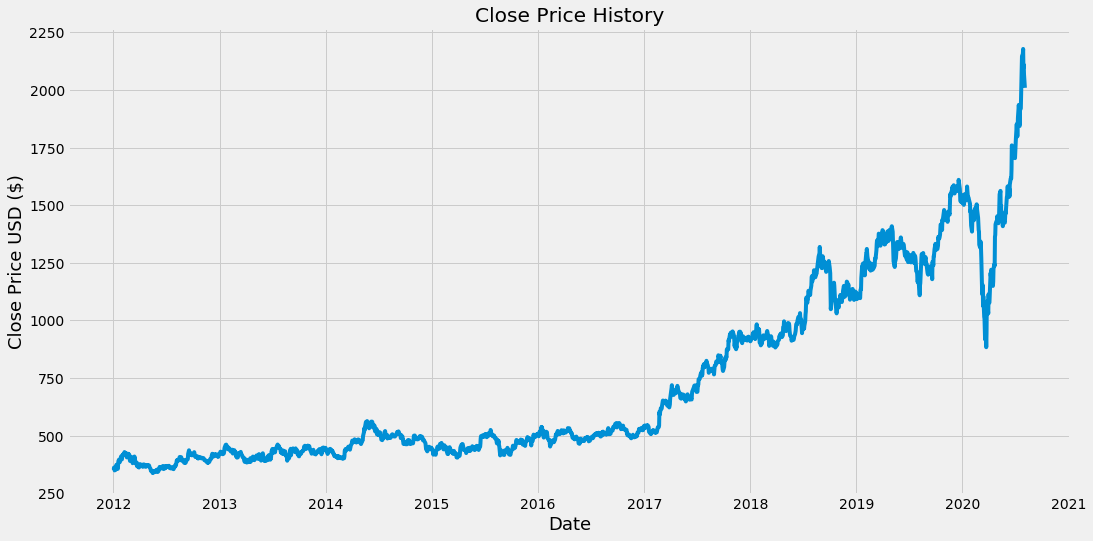

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new column with only 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)* .8)

training_data_len

1689

In [7]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00827603],
       [0.01319546],
       [0.01088524],
       ...,
       [0.96257448],
       [0.93987995],
       [0.9082978 ]])

In [8]:
#Create the training dataset 
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        

[array([0.00827603, 0.01319546, 0.01088524, 0.00635991, 0.01126573,
       0.0081945 , 0.01633464, 0.01960972, 0.0165249 , 0.01513875,
       0.0100155 , 0.01792461, 0.02817113, 0.0297747 , 0.03167724,
       0.02594244, 0.02925829, 0.03121519, 0.03921943, 0.03224799,
       0.03832251, 0.04215477, 0.04162477, 0.04408448, 0.04264399,
       0.04578317, 0.04954748, 0.04831082, 0.04542984, 0.04706059,
       0.04696547, 0.04363603, 0.03705869, 0.03862149, 0.04551138,
       0.04275271, 0.0444378 , 0.03909712, 0.02863317, 0.03272362,
       0.03931455, 0.036651  , 0.03750714, 0.03299541, 0.02730139,
       0.02329248, 0.02655397, 0.03328079, 0.03909712, 0.03761586,
       0.0327644 , 0.02615987, 0.02147148, 0.02295274, 0.02499117,
       0.0163754 , 0.01846819, 0.01467671, 0.01493491, 0.01348084])]
[0.013195458319405662]

[array([0.00827603, 0.01319546, 0.01088524, 0.00635991, 0.01126573,
       0.0081945 , 0.01633464, 0.01960972, 0.0165249 , 0.01513875,
       0.0100155 , 0.01792461, 0.0

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1629, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1629/1629 [==============================] - 56s 34ms/step - loss: 4.8476e-04


In [14]:
#Create the testing dataset 
#Create a new array containing scaled value from index 1603 to 2063
test_data = scaled_data[training_data_len - 60: , :]
#Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [15]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(( predictions - y_test)**2 ))
rmse

55.56024632811279

C:\Users\aryam\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


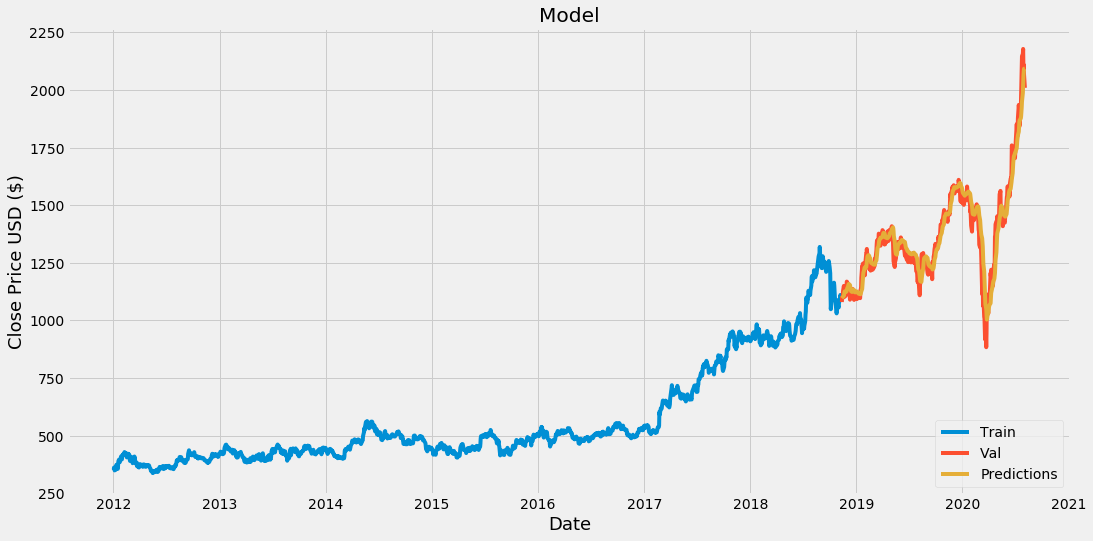

In [19]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-11-12,1080.000000,1096.564453
2018-11-13,1099.449951,1097.792236
2018-11-14,1097.949951,1099.681641
2018-11-15,1096.849976,1101.358154
2018-11-16,1127.400024,1102.572754
...,...,...
2020-07-28,2177.699951,2025.061768
2020-07-29,2096.649902,2060.941895
2020-07-30,2108.850098,2080.306885


In [21]:
#Get the quote
apple_quote = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-04-06')
#Create the dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price 
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1074.7913]]


In [22]:
#Get the quote
apple_quote2 = web.DataReader('DEEPAKNTR.NS', data_source='yahoo', start='2020-04-07', end='2020-04-07')
print(apple_quote2['Close'])

Date
2020-04-07    432.399994
Name: Close, dtype: float64
